# mlrose_hiive Tutorial Examples - Genevieve Hayes

## Overview

mlrose_hiive is a Python package for applying some of the most common randomized optimization and search algorithms to a range of different optimization problems, over both discrete- and continuous-valued parameter spaces. This notebook contains the examples used in the mlrose_hiive tutorial.

### Import Libraries

In [1]:
import mlrose_hiive
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

### Example 6: Fitting a Neural Network to the Iris Dataset

In [53]:
# check adult dataset 

In [4]:
config_data = {
    'animal':
        {'path': 'data/animal_clean.csv',
         'sep': ',',
         'encoder': "OneHotEncoder",
        'features': ','.join(['AnimalType', 'SexuponOutcome',  'Breed', 'Color', 'Sex', 'neuter_status']),
        'target': 'OutcomeType'},
    
    'adult':
        {
            'path': 'data/adult.csv',
            'sep': ',',
            'encoder': "OneHotEncoder",
            "features": ','.join(['workclass',
                                'education',
                                'marital-status',
                                'occupation',
                                'relationship',
                                'race',
                                'sex',
                                'native-country']),
                                 
             "target": "income"                    
            
        }
}

In [5]:
import pandas as pd

In [6]:
import pandas as pd
config1 = config_data['adult']
path = config1['path']
sep = config1['sep']
features = config1['features'].split(',')
target = config1['target']
data = pd.read_csv(path, sep=sep)

In [7]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
from sklearn.model_selection import train_test_split
#from utils.encoder import onehot_encoder, feature_encode_categorical, target_encoder
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

def feature_encode_categorical(df, categorical_columns):
    
    df[categorical_columns] = df[categorical_columns].fillna('Unknown')
    
    encoders = {}
    for column in categorical_columns:
        encoders[column] = LabelEncoder()
        print (column)
        df[column] = encoders[column].fit_transform(df[column])
    return df 
def onehot_encoder(df, categorical_columns):
    #feature encoding 
    X = feature_encode_categorical(df, categorical_columns)[categorical_columns]
   # print (X)
    ohe = OneHotEncoder(sparse=False)
    X_ohe = ohe.fit_transform(X)
   # print (X_ohe.shape)
    
    columns = ohe.get_feature_names(categorical_columns)
   # print (columns)
    
    X_cat = pd.DataFrame(X_ohe, columns = columns).reset_index().drop('index',axis=1)
    data = pd.concat([df.reset_index().drop('index',axis=1), X_cat], axis=1)

    return data.drop(categorical_columns,axis=1)

def train_test_generate(df, target,  encoder=None, features=None, test_size=0.3):
    
    if not encoder:
        if encoder not in ['OneHotEncoder', 'LabelEncoder', 'TargetEncoder']:
            raise ValueError('encoder must be None or OneHotEncoder or LabelEncoder or TargetEncoder !')
            
        if not features:
            raise ValueError('if encoder is not true, features need to be specified')
    
    if encoder == "OneHotEncoder":
        df = onehot_encoder(df, features)
        
    elif encoder == "LabelEncoder" or encoder == "TargetEncoder":
        df = feature_encode_categorical(df, features)
        
    
    X = df.loc[:, df.columns != target]
    y = df.loc[:, df.columns == target]
    

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 42)
    
    if encoder == 'TargetEncoder':
        X_train, X_test = target_encoder(X_train, y_train, X_test, features, target)
    
    
    
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_generate(data, target=target, features=features, encoder=config1['encoder'])

workclass
education
marital-status
occupation
relationship
race
sex
native-country


In [10]:
X_train

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_0,workclass_1,workclass_2,workclass_3,...,native-country_32,native-country_33,native-country_34,native-country_35,native-country_36,native-country_37,native-country_38,native-country_39,native-country_40,native-country_41
19749,34,56460,9,0,2179,12,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1216,48,243631,10,7688,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
27962,23,56402,10,0,0,30,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23077,56,255406,9,0,0,40,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
10180,17,297246,7,0,0,9,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29802,47,359461,13,0,0,40,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5390,31,147215,8,0,0,21,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
860,18,216284,7,0,0,20,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
15795,50,54261,9,0,0,84,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
import imblearn

In [12]:

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


def rebalance_data(X, y,  strategy="SMOTE"):
    
   # X = df.loc[:, df.columns != target]
   # y = df.loc[:, df.columns == target]

    
    try:
        if strategy=='SMOTE':
            sm = SMOTE(sampling_strategy='auto', k_neighbors=1, random_state=42)
            print ('this should happen')
            X_sample, y_sample = sm.fit_resample(X, y)
            #X_smote[target] = y_smote
            #df = X_smote
            #print ('after smote rebalanced, data shape is {}'.format(df.target.value_counts()))
        elif strategy=='Subsampling':

            #rus = RandomUnderSampler(sampling_strategy=0.5)
            rus = RandomUnderSampler()
            X_sample, y_sample = rus.fit_sample(X,y)
           # x_rus[target] = y_rus
           # df = x_rus
        else:
            raise ValueError('strategy is not supported!')
        
        return X_sample, y_sample
    
    except:
        return X,y
    
def normalizer(X_train, X_test ):

    scaler = StandardScaler()
    X_train_trans = scaler.fit_transform(X_train)
    X_test_trans = scaler.transform(X_test)


    return X_train_trans, X_test_trans 

In [13]:
from sklearn.preprocessing import StandardScaler 
X_train, y_train = rebalance_data(X_train, y_train)
        

X_train_scaled, X_test_scaled = normalizer(X_train, X_test)

this should happen


In [14]:
y_train

,income
0,<=50K
1,>50K
2,<=50K
3,<=50K
4,<=50K
...,...
34525,>50K
34526,>50K
34527,>50K
34528,>50K


In [15]:
# One hot encode target values
import numpy as np
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(np.array(y_train).reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(np.array(y_test).reshape(-1, 1)).todense()

In [54]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(9,9), activation = 'relu', max_iter=1000, solver = 'lbfgs' )
time_start = time.time()
clf.fit(X_train_scaled, y_train_hot)
fit_time = time.time() - time_start
print(f'Train: fit_time = {fit_time}')

Train: fit_time = 31.731895446777344


In [55]:
y_test_pred = clf.predict(X_test_scaled)
y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)
print (y_test_accuracy)

0.8429726686457161


In [40]:
# Initialize neural network object and fit object - attempt 1
import mlrose_hiive
import time
nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,4], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 2000, bias = True, is_classifier = True, 
                                 learning_rate = 0.8, early_stopping = False, restarts=5
                                 clip_max = 5, max_attempts = 100, random_state =3, curve=True)

start_time = time.time()
nn_model1.fit(X_train_scaled, y_train_hot)
end_time = time.time()
print ('fit_time is {}'.format(end_time - start_time))

fit_time is 75.17734885215759


In [102]:
# Initialize neural network object and fit object - attempt 1
import mlrose_hiive
import time
nn_model_rhc_test = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,4], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 2000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = False, restarts=5,
                                 clip_max = 5, max_attempts = 100, random_state =3, curve=True)

start_time = time.time()
nn_model_rhc_test.fit(X_train_scaled, y_train_hot)
end_time = time.time()
print ('fit_time is {}'.format(end_time - start_time))

fit_time is 560.0538332462311


In [103]:
# Predict labels for train set and assess accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

y_train_pred = nn_model_rhc_test.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_rhc_test.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7292499275991892
0.7102057528918005


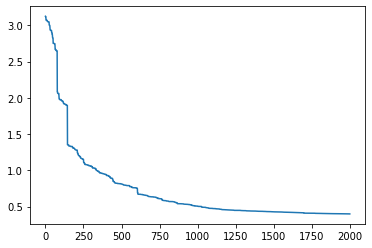

In [101]:
plt.plot(nn_model_rhc.fitness_curve)

In [95]:
# Predict labels for train set and assess accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

y_train_pred = nn_model_rhc.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_rhc.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.8186794092093831
0.7976251407513564


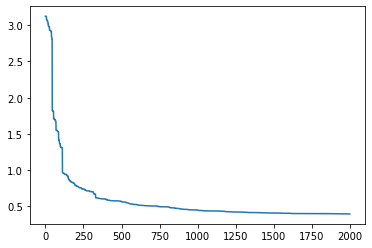

In [41]:
plt.plot(nn_model1.fitness_curve)

In [91]:
test_accur_gd_iter = []
for i in range(10, 50, 10):
    nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,4], activation ='relu', 
                                 algorithm ='random_hill_climb', 
                                 max_iters = 1000, bias = True, is_classifier = True, 
                                 learning_rate = 0.8, early_stopping = True, restarts = i,
                                 clip_max = 5, max_attempts = 100, random_state =3)
    
    nn_model1.fit(X_train_scaled, y_train_hot)
    
        # Predict labels for test set and assess accuracy
    y_test_pred = nn_model1.predict(X_test_scaled)

    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

    print(y_test_accuracy)
    
    test_accur_gd_iter.append(y_test_accuracy)

0.7542225406899375
0.7542225406899375


KeyboardInterrupt: 

In [107]:
# Predict labels for train set and assess accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

y_train_pred = nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

IndexError: list index out of range

In [43]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7976251407513564


In [44]:
# Initialize neural network object and fit object - attempt 2
nn_model_gd = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,4], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.00001, early_stopping = False, curve=True,
                                 clip_max = 100, max_attempts = 1000, random_state = 3)

start_time = time.time()
nn_model_gd.fit(X_train_scaled, y_train_hot)

print (time.time() - start_time)

357.0145251750946


In [48]:
nn_model_gd.fitness_curve

array([-3.12461805, -2.76429244, -0.77482074, ..., -0.26978372,
       -0.27128422, -0.27253525])

In [45]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model_gd.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.8305865492885659


In [132]:
max_iters_list = [100,1000,3000,5000]
learning_rate = [ 0.0001, 0.00001, 0.000001, 0.0000001]
clip_max = [3, 5, 10, 100 ]
max_attempts = [10, 100, 500]

In [134]:
test_accur_gd_iter = []
for i in max_iters_list:
    nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4,4], activation = 'relu', 
                                 algorithm = 'gradient_descent', 
                                 max_iters = i, bias = True, is_classifier = True, 
                                 learning_rate = 0.00001, early_stopping = True, curve=True,
                                 clip_max = 5, max_attempts = 100, random_state = 3)

    nn_model2.fit(X_train_scaled, y_train_hot)
    
        # Predict labels for test set and assess accuracy
    y_test_pred = nn_model2.predict(X_test_scaled)

    y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

    print(y_test_accuracy)
    
    test_accur_gd_iter.append(y_test_accuracy)

0.7778687685535879
0.7963967652779199
0.8125703756781656
0.8305865492885659


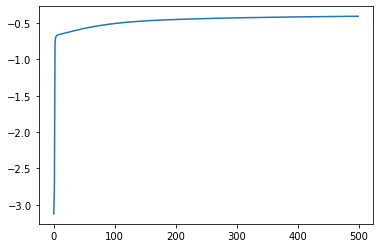

In [167]:
plt.plot(nn_model2.fitness_curve)

In [96]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5937148121609171


In [124]:
# Initialize neural network object and fit object - attempt 1
schedule = mlrose_hiive.GeomDecay(init_temp=1, decay=0.95, min_temp = 0.0001 )

import mlrose_hiive
import time
nn_model_sa_lr5_init1_d95 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4, 4], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.5, early_stopping = True, schedule=schedule,
                                 clip_max = 1000, max_attempts = 1000, random_state = 3, curve=True)

start_time = time.time()
nn_model_sa_lr5_init1_d95.fit(X_train_scaled, y_train_hot)
end_time = time.time()
print ('fit_time is {}'.format(end_time - start_time))

fit_time is 197.73330998420715


In [125]:
# Predict labels for train set and assess accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

y_train_pred = nn_model_sa_lr5_init1_d95.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_sa_lr5_init1_d95.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.8408919779901535
0.8017197256628109


In [110]:
# Initialize neural network object and fit object - attempt 1
schedule = mlrose_hiive.GeomDecay(init_temp=2, decay=0.99, min_temp = 0.0001 )

import mlrose_hiive
import time
nn_model_sa_lr1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4, 4], activation ='relu', 
                                 algorithm ='simulated_annealing', 
                                 max_iters = 5000, bias = True, is_classifier = True, 
                                 learning_rate = 0.1, early_stopping = True, schedule=schedule,
                                 clip_max = 1000, max_attempts = 1000, random_state = 3, curve=True)

start_time = time.time()
nn_model_sa_lr1.fit(X_train_scaled, y_train_hot)
end_time = time.time()
print ('fit_time is {}'.format(end_time - start_time))

fit_time is 271.2348132133484


In [109]:
# Predict labels for train set and assess accuracy
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score

y_train_pred = nn_model_sa.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model_sa.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.8216912829423689
0.80090080868052


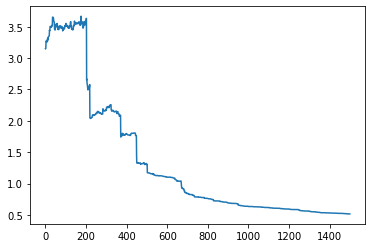

In [71]:
plt.plot(nn_model_sa.fitness_curve)

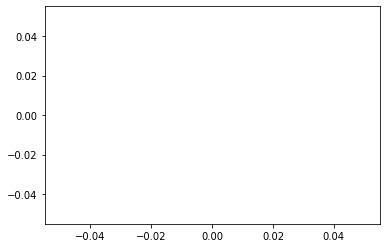

In [105]:
plt.plot(nn_model_sa_lr1.fitness_curve)

In [72]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model_sa.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)


print(y_test_accuracy)

0.771726891186406


In [142]:
# Initialize neural network object and fit object - attempt 1
import mlrose_hiive
import time
nn_model_ga_5 = mlrose_hiive.NeuralNetwork(hidden_nodes = [4, 4], activation ='relu', 
                                 algorithm ='genetic_alg', 
                                 max_iters = 500, bias = True, is_classifier = True, 
                                 learning_rate = 0.9, early_stopping = True, pop_size=50, mutation_prob=0.4,
                                 clip_max = 100, max_attempts = 1000, random_state = 3, curve=True)

start_time = time.time()
nn_model_ga_5.fit(X_train_scaled, y_train_hot)
end_time = time.time()
print ('fit_time is {}'.format(end_time - start_time))

fit_time is 793.8500740528107


In [143]:
nn_model_ga_5.fitness_curve

array([7.54263461, 5.96911588, 5.96911588, 4.95068154, 4.95068154,
       1.83031307, 1.83031307, 1.83031307, 1.83031307, 1.83031307,
       1.83031307, 1.83031307, 1.83031307, 1.83031307, 1.69365307,
       1.69365307, 1.69365307, 1.69365307, 1.69365307, 1.69365307,
       1.69365307, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314

In [74]:
nn_model_ga.fitness_curve

array([3.51984719, 3.00561039, 3.00561039, 3.00561039, 1.52068792,
       1.52068792, 1.52068792, 1.52068792, 1.52068792, 1.52068792,
       1.52068792, 1.52068792, 1.02697117, 1.02697117, 1.02697117,
       1.02697117, 1.02697117, 1.02697117, 1.02697117, 1.02697117,
       1.02697117, 1.02697117, 1.02697117, 1.02697117, 1.02697117,
       1.02697117, 1.02697117, 1.02697117, 1.02697117, 1.02697117,
       0.9065639 , 0.9065639 , 0.9065639 , 0.9065639 , 0.9065639 ,
       0.9065639 , 0.9065639 , 0.9065639 , 0.9065639 , 0.9065639 ,
       0.9065639 , 0.9065639 , 0.9065639 , 0.9065639 , 0.9065639 ,
       0.8156135 , 0.8156135 , 0.8156135 , 0.8156135 , 0.8156135 ,
       0.8156135 , 0.8156135 , 0.8156135 , 0.8156135 , 0.8156135 ,
       0.8156135 , 0.8156135 , 0.8156135 , 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314718,
       0.69314718, 0.69314718, 0.69314718, 0.69314718, 0.69314

In [144]:
# Predict labels for test set and assess accuracy

# Predict labels for train set and assess accuracy
y_train_pred = nn_model_ga_5.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

y_test_pred = nn_model_ga_5.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5
0.7631282628723514


In [75]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model_ga.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7631282628723514


In [77]:
loss_curve_rhc = nn_model1.fitness_curve
loss_curve_sa = nn_model_sa.fitness_curve
loss_curve_ga = nn_model_ga.fitness_curve
loss_curve_gd = nn_model_gd.fitness_curve

In [81]:
loss_curve_gd_reverse = [-i for i in loss_curve_gd]

In [78]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Log Loss vs Iterations')

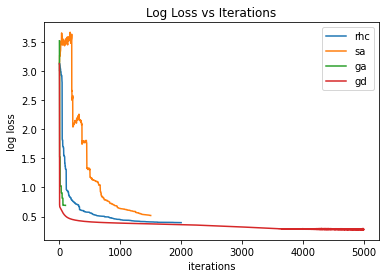

In [86]:
plt.plot(loss_curve_rhc, label = 'rhc')
plt.plot(loss_curve_sa, label = 'sa')
plt.plot(loss_curve_ga, label = 'ga')
plt.plot(loss_curve_gd_reverse, label = 'gd')
plt.legend()
plt.xlabel('iterations')
plt.ylabel('log loss')
plt.title('Log Loss vs Iterations')

In [64]:
# Predict labels for train set and assess accuracy
y_train_pred = nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.43191427743990735


In [65]:
# Predict labels for test set and assess accuracy
y_test_pred = nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.5937148121609171


### Example 7: Fitting a Logistic Regression to the Iris Data

In [55]:
# Initialize logistic regression object and fit object - attempt 1
lr_model1 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.0001, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100, 
                                      random_state = 3)

lr_model1.fit(X_train_scaled, y_train_hot)

In [56]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [57]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [58]:
# Initialize logistic regression object and fit object - attempt 2

lr_model2 = mlrose_hiive.LogisticRegression(algorithm = 'random_hill_climb', max_iters = 1000, 
                                      bias = True, learning_rate = 0.01, 
                                      early_stopping = True, clip_max = 5, max_attempts = 100,
                                      random_state = 3)

lr_model2.fit(X_train_scaled, y_train_hot)

In [59]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [60]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7


### Example 8: Fitting a Logistic Regression to the Iris Data using the NeuralNetwork() class

In [61]:
# Initialize neural network object and fit object - attempt 1
lr_nn_model1 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.0001, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model1.fit(X_train_scaled, y_train_hot)

In [62]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model1.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.19166666666666668


In [63]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model1.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.06666666666666667


In [64]:
# Initialize neural network object and fit object - attempt 2
lr_nn_model2 = mlrose_hiive.NeuralNetwork(hidden_nodes = [], activation = 'sigmoid', 
                                    algorithm = 'random_hill_climb', 
                                    max_iters = 1000, bias = True, is_classifier = True, 
                                    learning_rate = 0.01, early_stopping = True, 
                                    clip_max = 5, max_attempts = 100, random_state = 3)

lr_nn_model2.fit(X_train_scaled, y_train_hot)

In [65]:
# Predict labels for train set and assess accuracy
y_train_pred = lr_nn_model2.predict(X_train_scaled)

y_train_accuracy = accuracy_score(y_train_hot, y_train_pred)

print(y_train_accuracy)

0.6833333333333333


In [66]:
# Predict labels for test set and assess accuracy
y_test_pred = lr_nn_model2.predict(X_test_scaled)

y_test_accuracy = accuracy_score(y_test_hot, y_test_pred)

print(y_test_accuracy)

0.7
